In [1]:
#import all the necessary packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
sns.set()

In [2]:
#set the working and the data directories
path = os.getcwd()
pathdata = path+'/Data'
os.chdir(pathdata)

In [3]:
os.getcwd()

'/Users/geri/Documents/tisem/thesis/GitHub/thesis-master/data'

In [6]:
#read the excel file with dates for the forecasts
dates = pd.read_excel('SPF_rounds_dates.xlsx')
new_header = dates.iloc[0] 
dates = dates[1:] 
dates.columns = new_header
dates = dates.dropna()

In [7]:
#get all the unique dates
len(dates['Deadline to reply'].unique())

85

In [8]:
dates

,SPF round,Questionnaire\n sent out,Deadline to reply,Results published1\n (all or some aggregate results)2
3,1999Q1,1999-02-05 00:00:00,1999-02-12 00:00:00,not published
4,1999Q2,1999-04-26 00:00:00,1999-05-03 00:00:00,not published
5,1999Q3,1999-07-26 00:00:00,1999-08-06 00:00:00,not published
6,1999Q4,1999-10-27 00:00:00,1999-11-03 00:00:00,1999-12-09 00:00:00
7,2000Q1,2000-02-02 00:00:00,2000-02-09 00:00:00,2000-03-09 00:00:00
...,...,...,...,...
83,2019Q1,2019-01-07 00:00:00,2019-01-11 00:00:00,2019-01-25 00:00:00
84,2019Q2,2019-03-18 00:00:00,2019-03-22 00:00:00,2019-04-11 00:00:00
85,2019Q3,2019-07-01 00:00:00,2019-07-05 00:00:00,2019-07-26 00:00:00
86,2019Q4,2019-10-01 00:00:00,2019-10-07 00:00:00,2019-10-25 00:00:00


In [9]:
df = pd.DataFrame(columns=['SurveyDate', 'Source','CurrentIR', 'IRQ1', 'IRQ2', 'IRQ3', 'IRQ4'])
df['SurveyDate'] = dates['Deadline to reply'].repeat(128)
for each_date in dates['Deadline to reply'].unique():
    df.loc[df.SurveyDate == each_date,'Source'] = list(range(1,129))

In [10]:
mtoQ = {1: 1, 2: 1, 3:2, 4:2, 5:2, 7:3, 8:3, 10: 4, 11:4}

In [11]:
def qsahead(curr_forecast):
    Qs = []
    year = curr_forecast.year
    month = curr_forecast.month
    currQ = mtoQ[month]
    residQ = 5 - (4 - currQ + 1)
    for i in range(currQ, 5):
        qnew = str(year)+"Q"+str(i)
        Qs.append(qnew)
    yearnew = year + 1
    for i in range(1, residQ + 1):
        qnew = str(yearnew)+"Q"+str(i) 
        Qs.append(qnew)  
    return Qs

In [12]:
qsahead(curr_forecast)

NameError: name 'curr_forecast' is not defined

In [ ]:
for curr_forecast in dates['Deadline to reply'].tolist():
    print(curr_forecast)
    date_curr =  dates.loc[dates['Deadline to reply']==curr_forecast]['SPF round'].to_string().rsplit(' ', 1)[1]
    curr_csv = date_curr+".csv"
    currq = date_curr[-2:]
    df1 = pd.read_csv(curr_csv)  
    assumptions_index = df1.index[df1['INFLATION EXPECTATIONS; YEAR-ON-YEAR CHANGE IN HICP']=='ASSUMPTIONS'][0]
    df1 = pd.DataFrame(df1.iloc[assumptions_index+1:, :])
    if len(df1) == 0:
        continue
    new_headerdf1 = df1.iloc[0] 
    df1 = df1[1:] 
    df1.columns = new_headerdf1
    sources_list = np.array(df1['FCT_SOURCE'].unique().astype(int))
    allQs = qsahead(curr_forecast)
    for each_source in sources_list:
        try:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"CurrentIR"] = df1.loc[(df1['FCT_SOURCE']== each_source.astype(str))&(df1['TARGET_PERIOD'] == allQs[0]), 'IR'].values
        except:
            continue
        try:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"IRQ1"] = df1.loc[(df1['FCT_SOURCE']== each_source.astype(str))&(df1['TARGET_PERIOD'] == allQs[1]), 'IR'].values
        except:
            continue        
        try:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"IRQ2"] = df1.loc[(df1['FCT_SOURCE']== each_source.astype(str))&(df1['TARGET_PERIOD'] == allQs[2]), 'IR'].values
        except:
            continue
        try:
            df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"IRQ3"] = df1.loc[(df1['FCT_SOURCE']== each_source.astype(str))&(df1['TARGET_PERIOD'] == allQs[3]), 'IR'].values
        except:
            continue
            #df.loc[(df.SurveyDate == curr_forecast) & (df.Source==each_source),"IRQ4"] = df1.loc[(df1['FCT_SOURCE']== each_source.astype(str))&(df1['TARGET_PERIOD'] == allQs[4]), 'IR'].values

        

1999-02-12 00:00:00
1999-05-03 00:00:00
1999-08-06 00:00:00
1999-11-03 00:00:00
2000-02-09 00:00:00
2000-05-05 00:00:00
2000-08-04 00:00:00
2000-11-02 00:00:00
2001-02-01 00:00:00
2001-05-03 00:00:00
2001-08-03 00:00:00
2001-10-29 00:00:00
2002-02-04 00:00:00
2002-04-22 00:00:00
2002-07-22 00:00:00
2002-10-23 00:00:00
2003-01-27 00:00:00
2003-04-24 00:00:00
2003-07-23 00:00:00


In [48]:
df4qs = df.drop(['IRQ4'], axis = 1)

In [52]:
df4qs = df4qs.dropna()

In [54]:
df4qs

,SurveyDate,Source,CurrentIR,IRQ1,IRQ2,IRQ3
15,2002-02-04,1,3.25,3,3,3.25
15,2002-02-04,4,3,3,3,3.25
15,2002-02-04,10,3,3,3,3.25
15,2002-02-04,11,3.25,2.75,2.75,3
15,2002-02-04,14,3.25,2.75,2.75,3.25
...,...,...,...,...,...,...
87,2020-01-13,118,0,0,0,0
87,2020-01-13,119,0,0,0,0
87,2020-01-13,121,0,0,0,0
87,2020-01-13,127,0,0,0,0


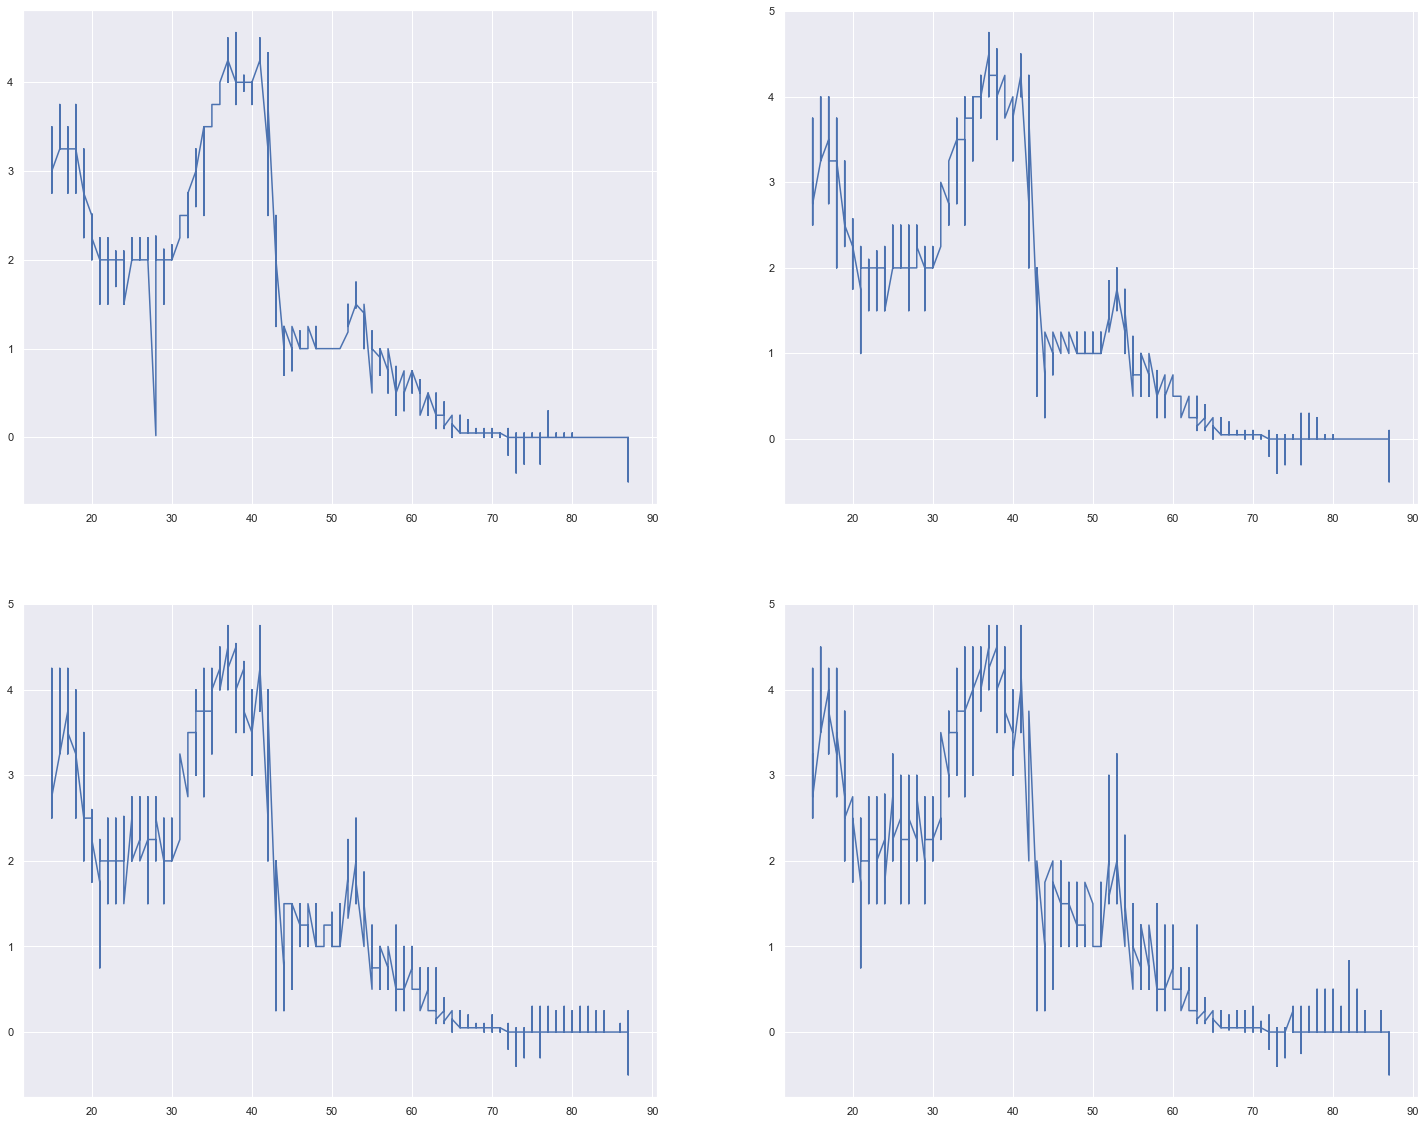

In [56]:
sns.set()
fig, axs = plt.subplots(2, 2, figsize=(25, 20))
axs[0,0].plot(df4qs['CurrentIR'].dropna().astype(float))
axs[0,1].plot(df4qs['IRQ1'].dropna().astype(float))
axs[1,0].plot(df4qs['IRQ2'].dropna().astype(float))
axs[1,1].plot(df4qs['IRQ3'].dropna().astype(float))

In [57]:
df.to_pickle('PRate.pkl')